# Importing library

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For displaying images


import warnings
warnings.filterwarnings("ignore")

# Model Building

In [3]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))  # Adjust input_shape to (224, 224, 3)

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

################### CNN - 2 ###################
classifier.add(Convolution2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

################### CNN - 3 ###################
classifier.add(Convolution2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection (Neural Network) ###################
classifier.add(Dense(units=512, activation='relu'))   # Hidden layer with 512 neurons
classifier.add(Dense(units=3, activation='softmax'))  # Output layer with 3 neurons (one for each category)

In [4]:
# Compiling the CNN
classifier.compile(optimizer=Adam(learning_rate=0.001), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

# Data Preprocessing and Augmentation

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the Data

In [8]:
training_set = train_datagen.flow_from_directory(
    r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Multiclass classification
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Multiclass classification
    subset='validation'
)

test_set = test_datagen.flow_from_directory(
    r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)

Found 623 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Found 89 images belonging to 3 classes.


# Training the Model

In [9]:
result = classifier.fit(training_set, epochs=20, validation_data=validation_set)

Epoch 1/20


2024-09-18 18:08:27.520758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - ETA: 0s - loss: 2.5775 - accuracy: 0.4109

2024-09-18 18:08:39.353068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 13s 636ms/step - loss: 2.5775 - accuracy: 0.4109 - val_loss: 1.0251 - val_accuracy: 0.5419
Epoch 2/20
20/20 [==============================] - 12s 627ms/step - loss: 0.9985 - accuracy: 0.5233 - val_loss: 0.9066 - val_accuracy: 0.7032
Epoch 3/20
20/20 [==============================] - 13s 627ms/step - loss: 0.8948 - accuracy: 0.6356 - val_loss: 0.9747 - val_accuracy: 0.6387
Epoch 4/20
20/20 [==============================] - 13s 633ms/step - loss: 0.7648 - accuracy: 0.6934 - val_loss: 0.7721 - val_accuracy: 0.6968
Epoch 5/20
20/20 [==============================] - 14s 676ms/step - loss: 0.7617 - accuracy: 0.6629 - val_loss: 0.6925 - val_accuracy: 0.7484
Epoch 6/20
20/20 [==============================] - 13s 662ms/step - loss: 0.6531 - accuracy: 0.6934 - val_loss: 0.6700 - val_accuracy: 0.7226
Epoch 7/20
20/20 [==============================] - 14s 687ms/step - loss: 0.6434 - accuracy: 0.7368 - val_loss: 0.6625 - val_accuracy: 0.7355
Epoch 8/20

In [40]:
# # Training the Model
# result = classifier.fit(training_set,
#                         epochs=30,  # Increase epochs if needed
#                         validation_data=test_set)

In [41]:
classifier.save('shoe_classifier.keras')

# Load the saved model

In [42]:
reload_model = load_model("shoe_classifier.keras")

In [43]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

# Output

In [44]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(224, 224))   # Adjust target_size to (224, 224)
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255
    predictions = reload_model.predict(raw_img)[0]
    class_indices = training_set.class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[np.argmax(predictions)]
    
    plt.imshow(cv2.imread(path))  # Display Image
    plt.axis('off')
    plt.show()
    
    print('Predicted Label:', predicted_class)

In [45]:
import os 
os.chdir(r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/Images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


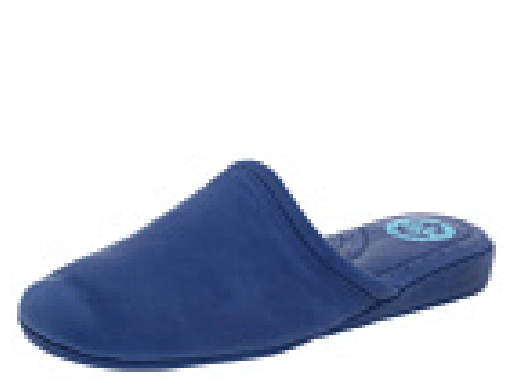

Predicted Label: Slippers


In [46]:
# Example usage
model_output(r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/Images/image_file.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


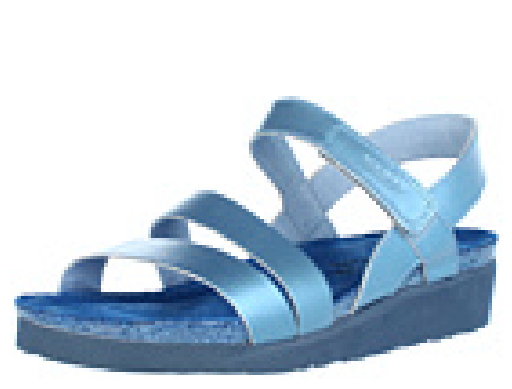

Predicted Label: Sandals


In [47]:
# Example usage
model_output(r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/Images/image (27).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


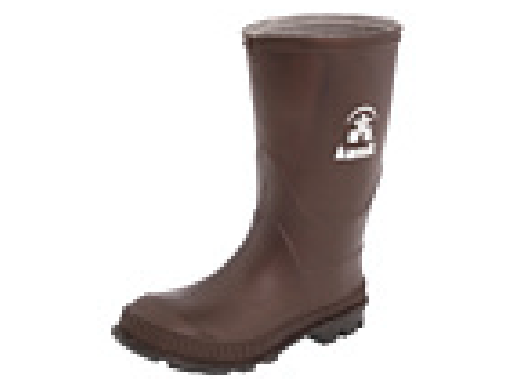

Predicted Label: Boots


In [48]:
# Example usage
model_output(r"/home/fahad.kachhi/GIT HUB/(CNN) Shoes Classification by  Fahad Kacchi  (1)/Shoe Classification Data/Images\image (23).jpg")